<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week4_work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week4work1アヤメ分類問題の復習。[サンプル答案](https://github.com/kokikudo/python_practices/blob/master/example_answer_week4_work1.ipynb)を参考に学習する。

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

### **問題1　2値分類を行うための特徴量とカテゴリを選択**
* virgicolorとvirginica
* sepal_lengthとpetal_length

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([X, y], axis=1)

df_selected = df.query("Species == [1, 2]").loc[:, ["sepal_length", "petal_length", "Species"]]
display(df_selected.head())
display(df_selected.describe())

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


### **問題2　データ分析**
Week3課題同様、抜き出したデータの散布図とヴァイオリン図を可視化する。

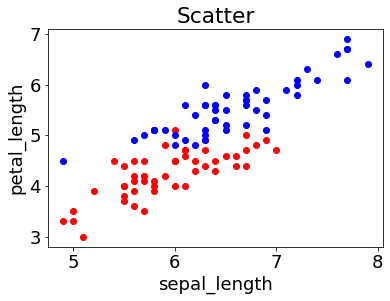

In [ ]:
x_0 = df_selected[df_selected.Species == 1].iloc[:, 0]  # 1のsepal
y_0 = df_selected[df_selected.Species == 1].iloc[:, 1]  # 1のpetal

x_1 = df_selected[df_selected.Species == 2].iloc[:, 0]  # 2のsepal
y_1 = df_selected[df_selected.Species == 2].iloc[:, 1]  # 2のsepal

plt.rcParams['font.size'] = 18
fig = plt.figure()
plt.title('Scatter')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_1, c='blue');

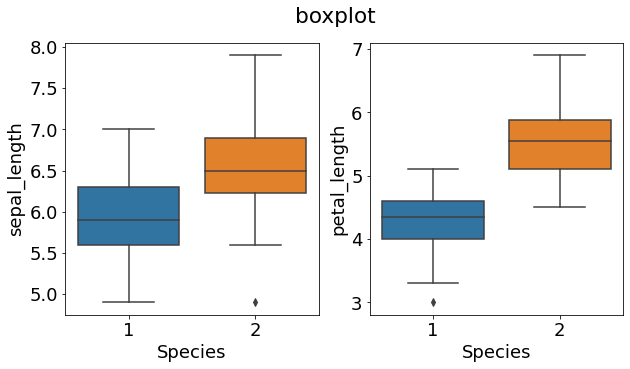

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('boxplot')
sns.boxplot(x='Species', y='sepal_length', data=df_selected, ax=axes[0])
sns.boxplot(x='Species', y='petal_length', data=df_selected, ax=axes[1]);

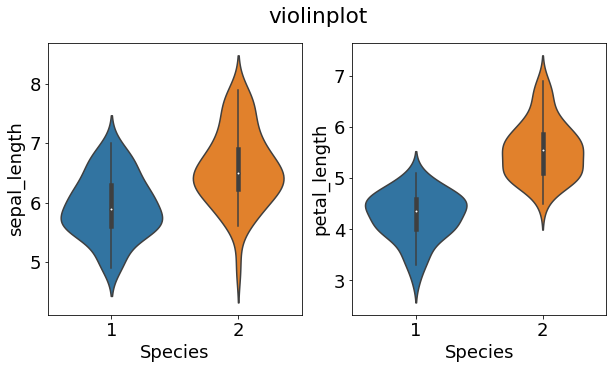

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('violinplot')
sns.violinplot(x='Species', y='sepal_length', data=df_selected, ax=axes[0])
sns.violinplot(x='Species', y='petal_length', data=df_selected, ax=axes[1]);

### **問題3　前処理・訓練用データと検証用データの分割**
訓練用と検証用で分ける（75：25）。

機械学習ライブラリのsklearnは、入力値がndarrayであることを想定されて作られているため、ndarrayに変換する。

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1].values,
                                    df_selected.iloc[:, -1].values, random_state=42)

print(f'X_train.shape : {X_train.shape}, X_test.shape : {X_test.shape}')

X_train.shape : (75, 2), X_test.shape : (25, 2)


### **問題4　前処理・標準化**
分類精度を高めるため、各データを標準化させる。

fitで計算し、transformで元のデータを変換するのだが、**検証用データ（X_test）は未知のデータ（今は存在しない）の代わりなので、標準化してはいけない。**標準化しようがないという程で処理する。

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

### **問題5　学習と推定**
最近傍法（k-nearest neighbors, k-nn）で学習を行う。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# モデルに引数を渡してインスタンス化する
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)

# 学習する
# KNeighborsClassifierクラスのfitメソッドにtrainデータをいれる
neigh_1.fit(X_train_transformed, y_train)
neigh_3.fit(X_train_transformed, y_train)
neigh_5.fit(X_train_transformed, y_train)

# 推定する
# 検証用の入力データをpredictメソッドの引数に渡して予測値を出す
y_pred_neigh_1 = neigh_1.predict(X_test_transformed)
y_pred_neigh_3 = neigh_3.predict(X_test_transformed)
y_pred_neigh_5 = neigh_5.predict(X_test_transformed)

In [ ]:
print('1-nn(距離が近い点の数が1)の推定結果:{}'.format(y_pred_neigh_1))
print('3-nn(距離が近い点の数が3)の推定結果:{}'.format(y_pred_neigh_3))
print('5-nn(距離が近い点の数が5)の推定結果:{}'.format(y_pred_neigh_5))


1-nn(距離が近い点の数が1)の推定結果:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3-nn(距離が近い点の数が3)の推定結果:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5-nn(距離が近い点の数が5)の推定結果:[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


### **問題6　評価**
出した推定値と検証用データの出力値（正解値）の近さを計算し、推定値を評価する。

2値分類の評価指標値には4種類あり、それぞれの意味を理解するには混同行列をみる必要がある。

* sklearnで4種類の指標値を出す。
* sklearnで混同行列を表示する。
* 4種類の指標値の意味を理解する。

In [ ]:
from sklearn import metrics #指標値を出すメソッドが入ったクラス

def evaluate(y_true, y_pred):
    # 4種類の指標値と混同行列を算出し、結果を返す
    
    # それぞれの関数に正解値と推定値を渡す
    #　正解率
    acc = metrics.accuracy_score(y_test, y_pred)    
    #　適合率
    precision = metrics.precision_score(y_test, y_pred)
    # 再現率
    recall = metrics.recall_score(y_test, y_pred)
    # F値
    f1 = metrics.f1_score(y_test, y_pred)

    # 混同行列
    confusion = metrics.confusion_matrix(y_test, y_pred)

    return acc, precision, recall, f1, confusion

In [ ]:
print('1-nn')
print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_1)))
print('------------------')
print('3-nn')
print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_3)))
print('------------------')
print('5-nn')
print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_5)))

1-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
------------------
3-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
------------------
5-nn
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


4つの指標値の意味は、混同行列を可視化するとわかりやすい。

公式リファレンスの関数を利用し、混同行列を可視化してみる。

Confusion matrix, without normalization
[[12  2]
 [ 3  8]]


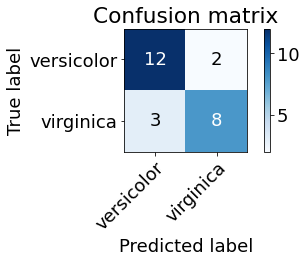

In [ ]:
# 公式ドキュメントの関数を若干修正して使用

from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text ann
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_neigh_1, classes=iris.target_names,
                      title='Confusion matrix')
plt.show()

y軸の正解値に対して、x軸の予測値の個数が行列になっているのが混同行列。

左上の12で言えば、versicolorが正解で予測値もversicolorになった個数が12個。

右上の2は、正解はversicolorなのにvirginicaと予測してしまった個数が2個。

という意味である。

virsinicaであるかどうかを判定する問題、と捉えると、virginicaを**陽性（Positive）**、versicolorを**陰性（Negative）**と呼ぶことになり、混同行列をみると、左上がTrueNegative（正しく陰性を予測できた）、右上がFalsePositive（間違えて陽性と予測した）、左下がFalseNegative（間違えて陰性を予測した）、右下をTruePositive（正しく陽性を予測できた）と呼べる。

そして、4つの指標値は以下の計算式で求めることが出来る。
<br>

 * Accuary(正解率)は全てのなかで正解した割合$\quad\frac{TP+TN}{TP+TN+FP+FN}$

 * Precision(適合率)はPositiveだと予測し、本当にPositiveだった割合$\quad\frac{TP}{TP+FP}$

 * Recall(再現率)は正解がPositiveで、Positiveだと予測した割合$\quad\frac{TP}{TP+FN}$

 * F1はPresitionとRecallの調和平均$\quad\frac{Precision*Recall}{Precision+Recall}$

 全てを覚えなくても、選ばれた中に間違いが少ない状態を目指す時はPrecisionをあげるようにする。病院の陽性・陰性の区別やスパムメールの是非など。

 見逃すのがまずいような問題（不正アクセス検知）などでは、怪しいものは全てアウトという考えから、PrecisionよりRecallを優先する時もある。

 F1はPrecisionとRecallのバランスを取った値で、ひとまずこれを確認する人も多い。そのほか、AUCという指標値も存在する。

### **問題7　可視化**
問題の可視化の登場だ。今回は特徴量が2つなので散布図で可視化ができる。決定領域を描写する関数を利用し可視化する。

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.rcParams['font.size'] = 12
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

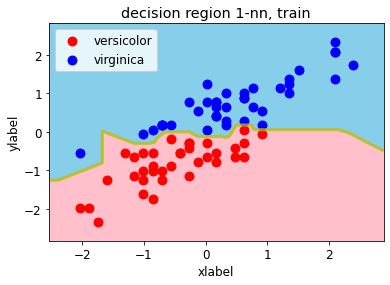

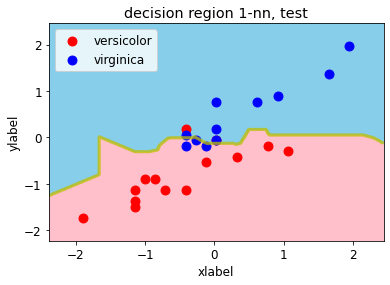

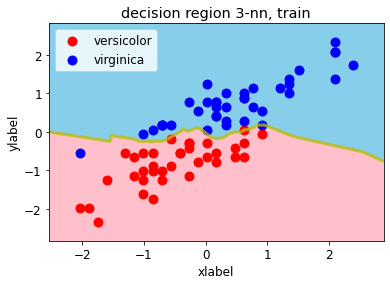

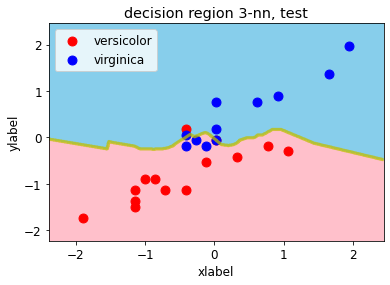

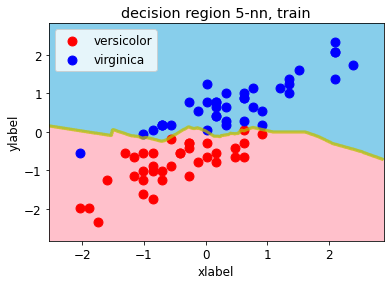

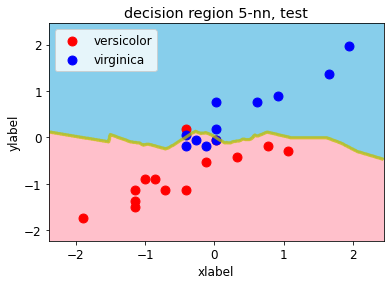

In [ ]:
# 関数に通したいモデルと名前をリストに格納
models = [neigh_1, neigh_3, neigh_5]
model_names = ['1-nn', '3-nn', '5-nn']

for model, model_names in zip(models, model_names):
    decision_region(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_names, 'train'))
    decision_region(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_names, 'test'))

1-nnは一番近い値に分類されるため、trainデータでは完全に分類できている。が、testデータではグラフの中央部でうまく分類できていない。

3-nnと5-nnに至っては、train、test両方に分類ミスが見受けられる。

### **問題8　他の手法の学習**
以下全ての手法を試し、指標値を出す。可視化をしてどのような決定領域なのかなどを考察する。
* 　最近傍法 
*　ロジスティック回帰
*　SVM
*　決定木
*　ランダムフォレスト

学習させる際、引数に調整すべきハイパーパラメーターがあるが、今回はデフォルトで良い。

1-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
 confusion matrix
[[12  2]
 [ 3  8]]


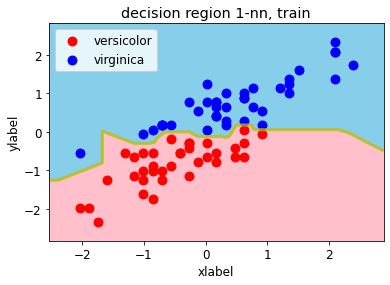

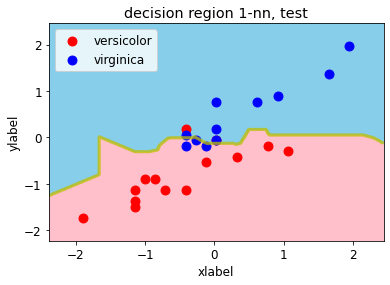

3-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
 confusion matrix
[[12  2]
 [ 3  8]]


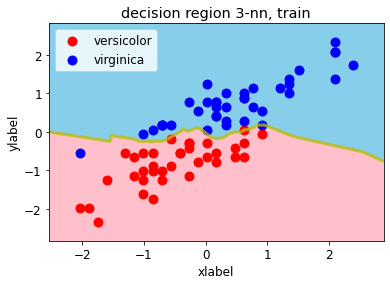

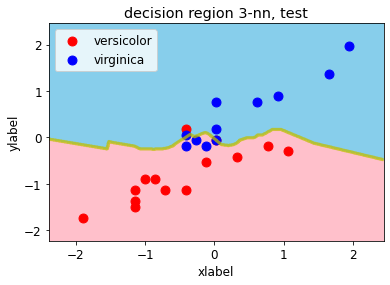

5-nn
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
 confusion matrix
[[13  1]
 [ 4  7]]


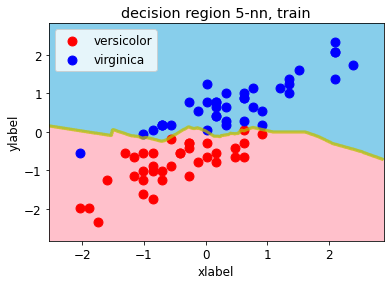

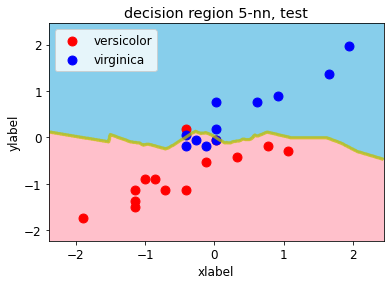

Logistic Regression
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
 confusion matrix
[[12  2]
 [ 2  9]]


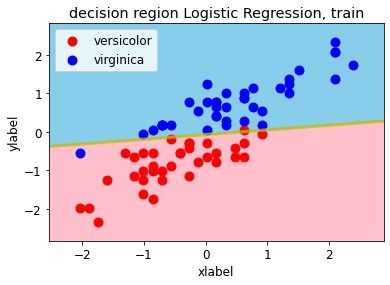

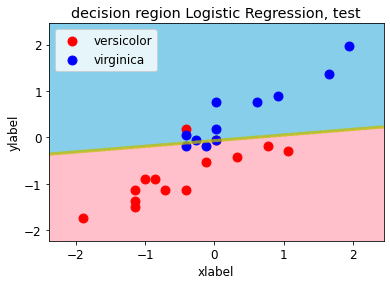

SVM
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
 confusion matrix
[[12  2]
 [ 2  9]]


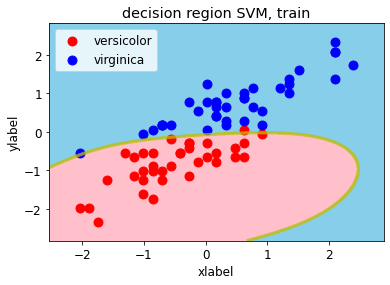

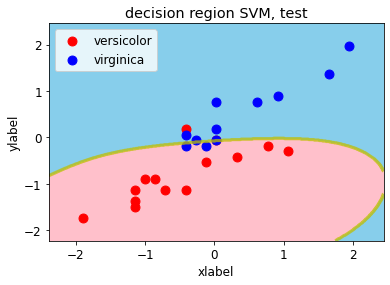

Decision Tree
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
 confusion matrix
[[13  1]
 [ 3  8]]


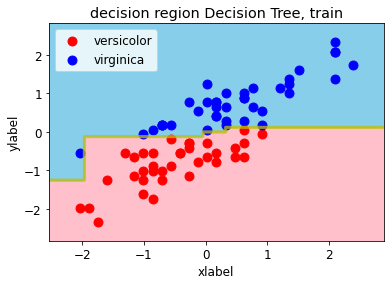

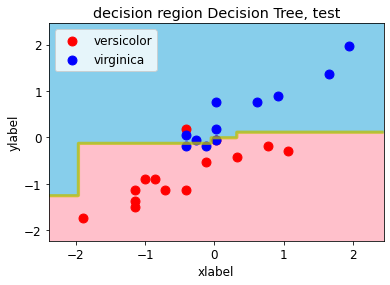

Random Forest
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
 confusion matrix
[[13  1]
 [ 4  7]]


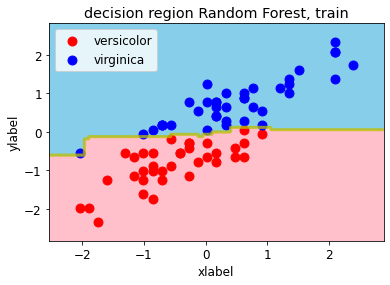

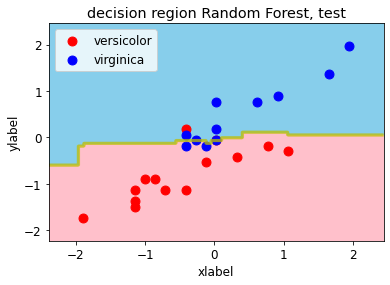

In [ ]:
# 各種モデルをimportし、for文で一気に処理する
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 各モデルをインスタンス化
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
logistic_reg = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# 可視化
# for分の前に各モデル名とインスタンスを格納したリストを作っておく
models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ['1-nn', '3-nn', '5-nn', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate(y_test, y_pred)))
    decision_region(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))


### **問題9　標準化の有無の比較**
標準化をしなかった場合、標準化した時とどのような違いがあるか調べる。



1-nn
----with standard scaling----
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
 confusion matrix
[[12  2]
 [ 3  8]]


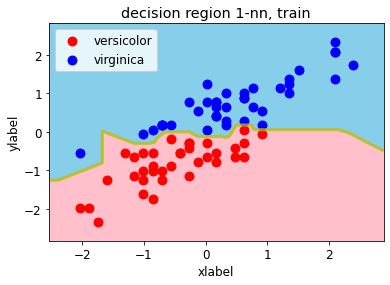

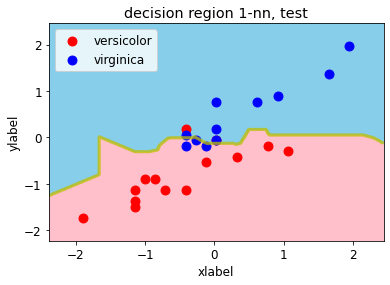

----without standard scaling----
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
 confusion matrix
[[12  2]
 [ 3  8]]


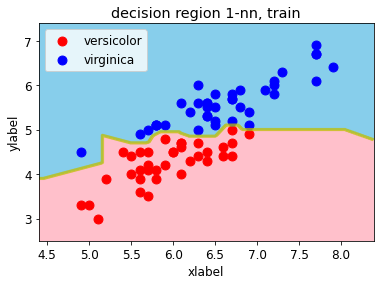

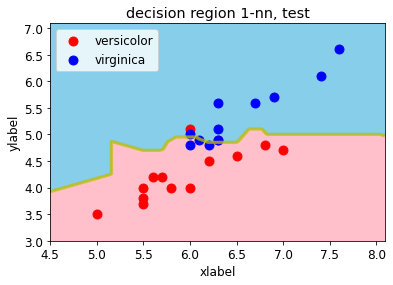

3-nn
----with standard scaling----
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
 confusion matrix
[[12  2]
 [ 3  8]]


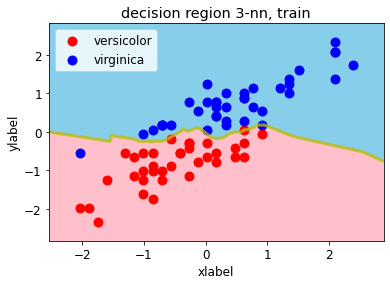

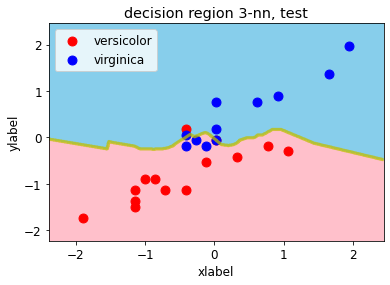

----without standard scaling----
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
 confusion matrix
[[12  2]
 [ 3  8]]


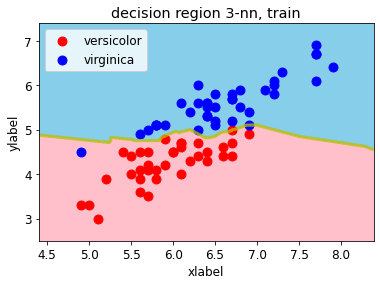

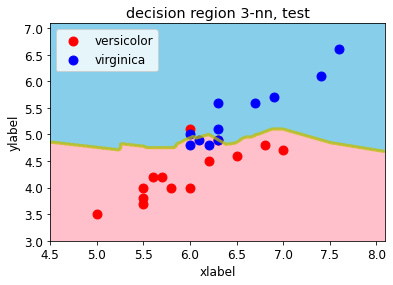

5-nn
----with standard scaling----
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
 confusion matrix
[[13  1]
 [ 4  7]]


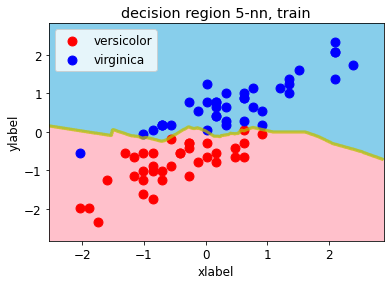

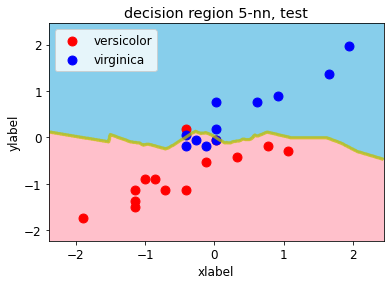

----without standard scaling----
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
 confusion matrix
[[13  1]
 [ 4  7]]


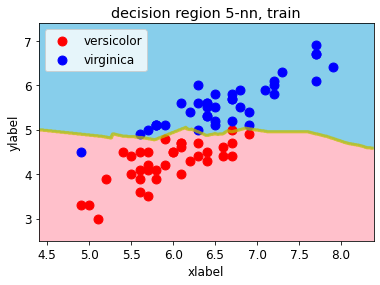

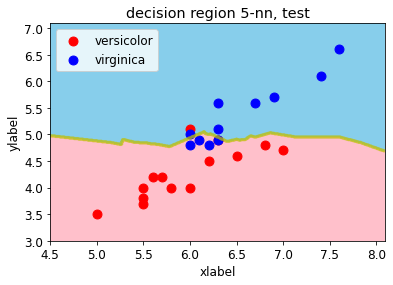

Logistic Regression
----with standard scaling----
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
 confusion matrix
[[12  2]
 [ 2  9]]


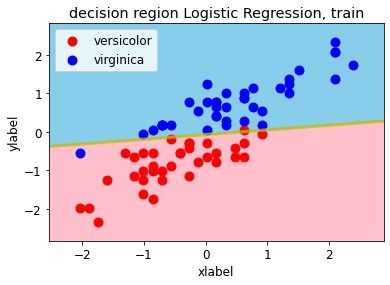

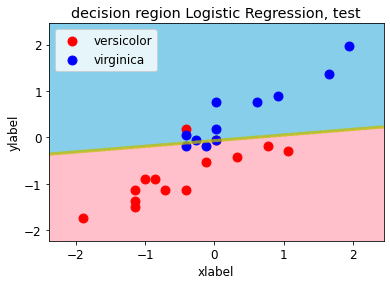

----without standard scaling----
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
 confusion matrix
[[12  2]
 [ 2  9]]


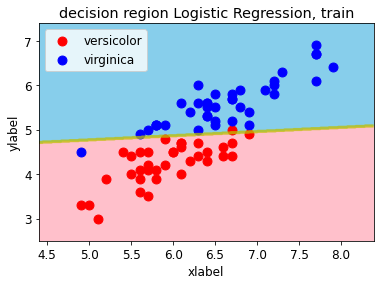

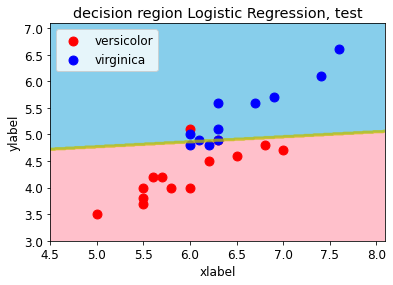

SVM
----with standard scaling----
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
 confusion matrix
[[12  2]
 [ 2  9]]


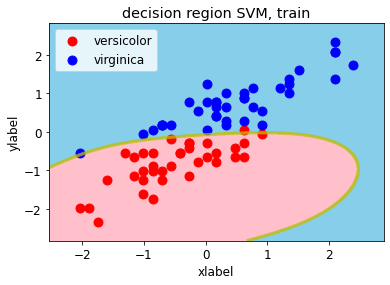

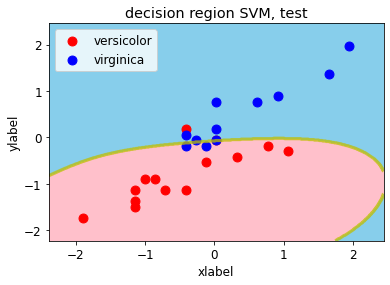

----without standard scaling----
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
 confusion matrix
[[12  2]
 [ 2  9]]


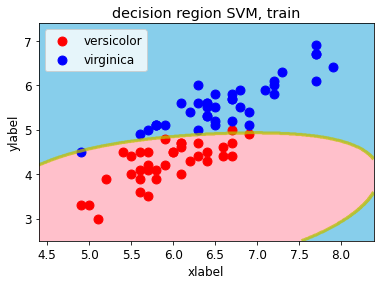

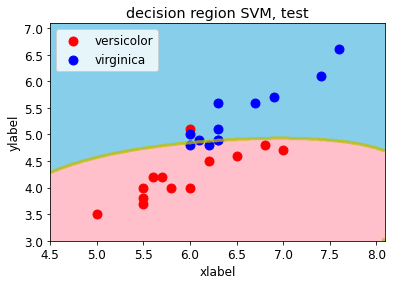

Decision Tree
----with standard scaling----
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
 confusion matrix
[[13  1]
 [ 3  8]]


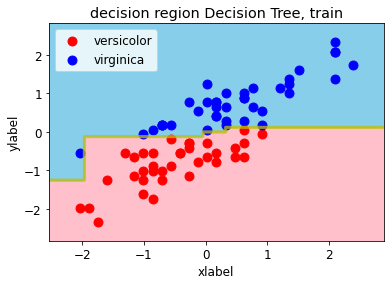

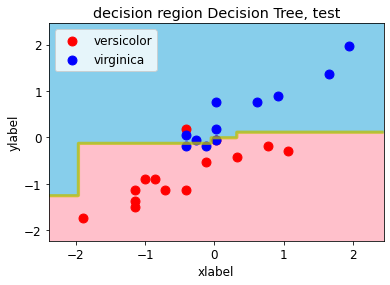

----without standard scaling----
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
 confusion matrix
[[13  1]
 [ 3  8]]


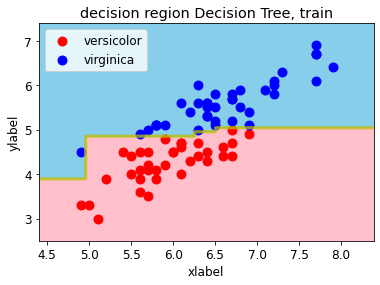

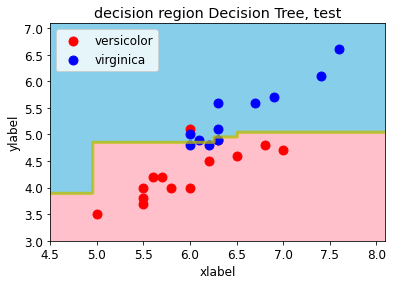

Random Forest
----with standard scaling----
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
 confusion matrix
[[13  1]
 [ 4  7]]


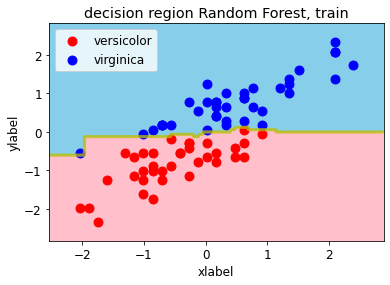

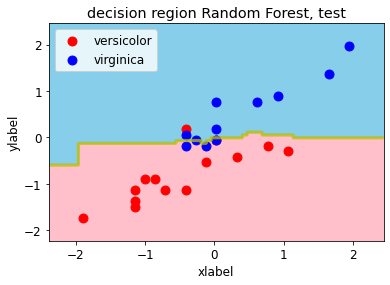

----without standard scaling----
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
 confusion matrix
[[13  1]
 [ 4  7]]


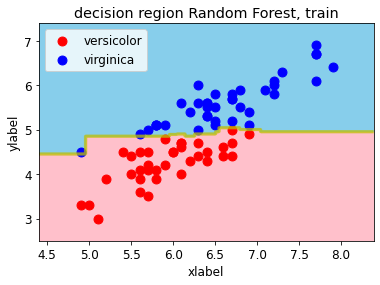

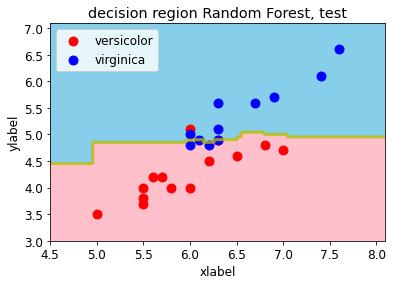

In [ ]:
models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ['1-nn', '3-nn', '5-nn', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

# さっきのfor文に標準化してないデータを処理するコードを追加
for model, model_name in zip(models, model_names):
    print(model_name)

    print('----with standard scaling----')
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate(y_test, y_pred)))
    decision_region(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

    print('----without standard scaling----')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate(y_test, y_pred)))
    decision_region(X_train, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region(X_test, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

### **問題10　全ての目的変数を使用して精度が高い手法を試す**
全種類のデータを使って、最も精度の高い手法を探す。

**多値になることの変更点**

指標値precision, recall, f値はライブラリのパラメータをデフォルトから変更する。マイクロ平均やマクロ平均という考え方を使う。
また、可視化の関数を少し変える必要がある。

**変更箇所**
* 抽出を列のみにする
* 決定領域の可視化関数でtarget_names、n_class、scatter_color、contourf_colorを3値に対応させる
* 指標値計算の関数のaverage引数を与える
以下の例ではSVMとランダムフォレストは完全に正解することができました。シード値次第ではそのようにならない場合もあります。

**（補足）**

PrecisionやRecallの計算のマイクロ平均やマクロ平均というのは、計算順序の違いになります。

マクロ平均はそれぞれの種類をPositiveだと考えた2値分類のPrecisionやRecallを求めた後に、平均をとります。

一方、マイクロ平均は混同行列から直接計算することを考えます。この時、それぞれの種類に対して合っていればTP、間違って入ればFPまたはFNとします。この場合はAccuracyもPrecisionもRecallもF1も同じ値になります。

マクロ平均かマイクロ平均かで、ある種類のラベルが少ないような不均衡なデータの場合に、その影響の仕方が変わります。

以下ではまずマクロ平均を求めています。

In [ ]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=['Species'])
df = pd.concat([X, y], axis=1)

df_selected = df.loc[:, ["sepal_length", "petal_length", "Species"]]

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.iloc[:, -1], test_size=0.25, random_state=42)

print('X_train.shape : {}, X_test.shape : {}'.format(X_train.shape, X_test.shape))

scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

X_train.shape : (112, 2), X_test.shape : (38, 2)


In [ ]:
def decision_region_3dim(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    3値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Paramaters
    ---------------
    X : ndarray, shape(n_samples, 3)
    特徴量
    y : ndarray, shape(n_samples, )
    ラベル
    model : object
    学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
    推定値を計算する間隔を設定する
    title : str
    グラフのタイトルの文章を与える
    xlabel, ylabel : str
    軸ラベルの文章を与える
    target_names = : list of str
    凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']    # 3色に変更
    contourf_color = ['lightgreen', 'pink', 'skyblue']  # 3色に変更
    n_class = 3 # クラス数変更

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.rcParams['font.size'] = 12
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def evaluate_multi(y_true, y_pred, average='macro'):
    """
    多値分類の指標値を一括計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)

    # precisionとrecallとf1をマクロ平均で計算する。
    precision = metrics.precision_score(y_test, y_pred, average=average)
    recall = metrics.recall_score(y_test, y_pred, average=average)
    f1 = metrics.f1_score(y_test, y_pred, average=average)

    confusion = metrics.confusion_matrix(y_test, y_pred)

    return acc, precision, recall, f1, confusion

1-nn
----with standard scaling----
acc : 0.8947368421052632
precision : 0.8897435897435897
recall : 0.8863636363636364
f1 : 0.8838383838383838
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]


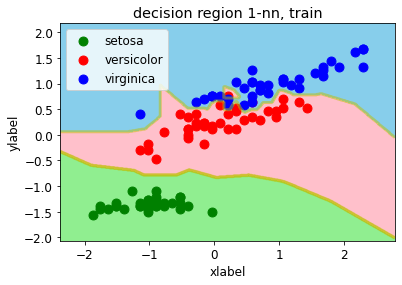

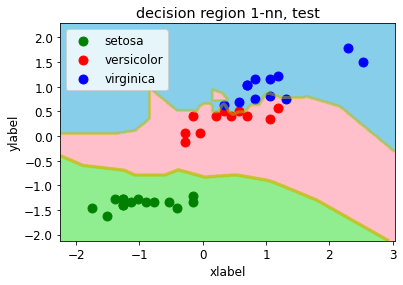

----without standard scaling----
acc : 0.8947368421052632
precision : 0.8897435897435897
recall : 0.8863636363636364
f1 : 0.8838383838383838
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]


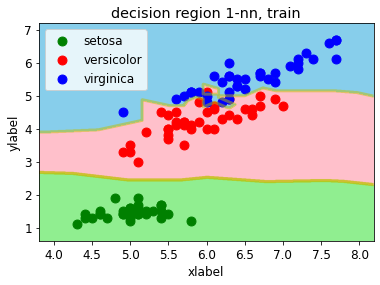

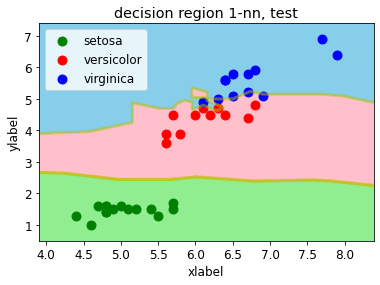

3-nn
----with standard scaling----
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


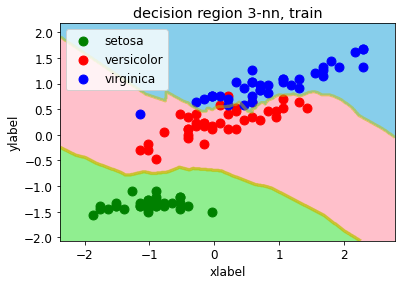

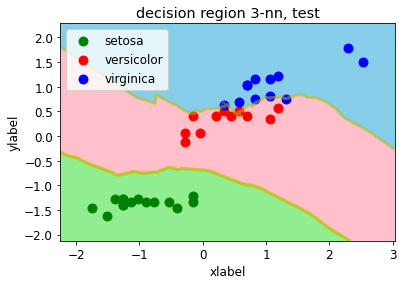

----without standard scaling----
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


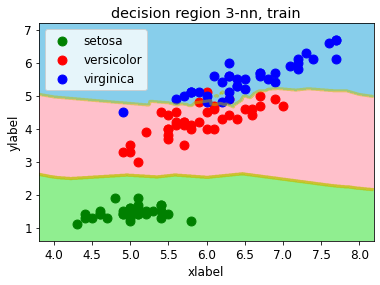

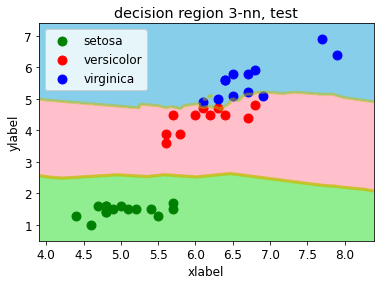

5-nn
----with standard scaling----
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


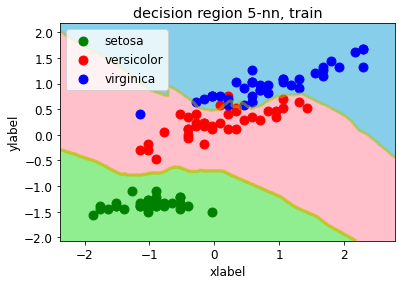

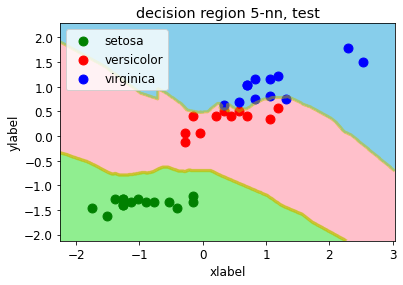

----without standard scaling----
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


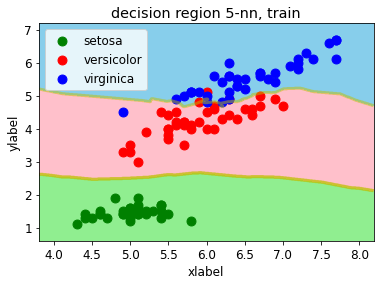

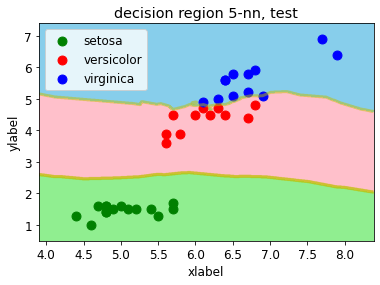

Logistic Regression
----with standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


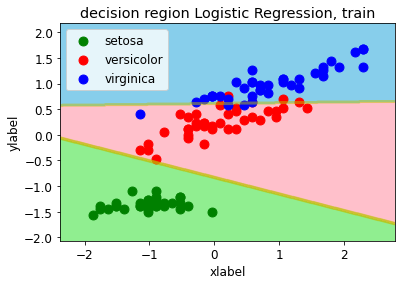

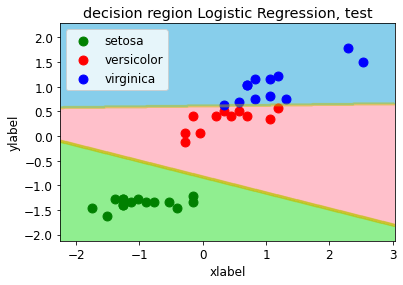

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


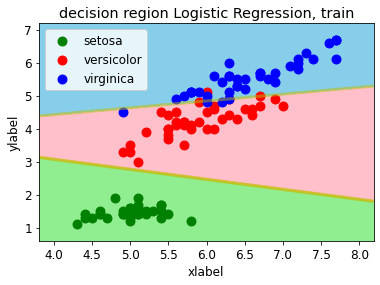

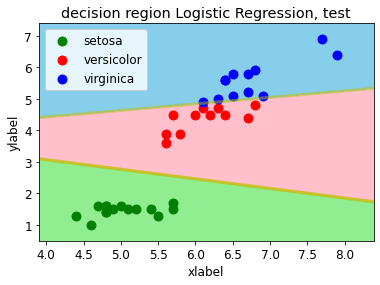

SVM
----with standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


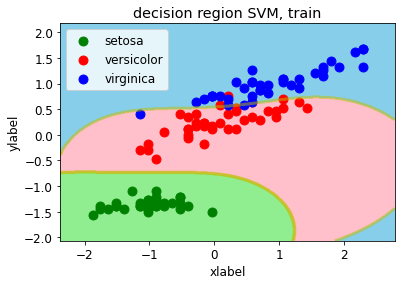

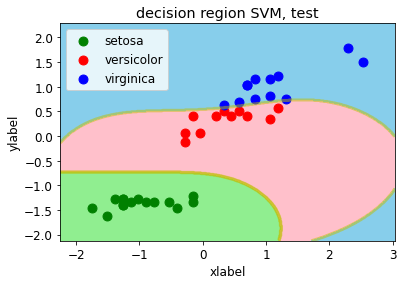

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


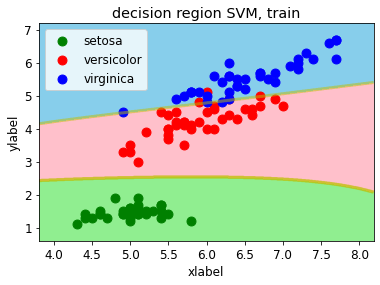

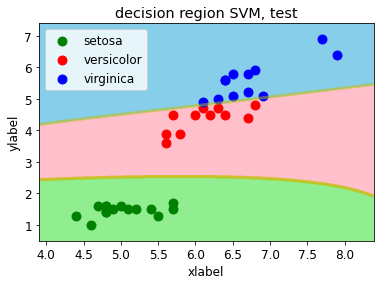

Decision Tree
----with standard scaling----
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


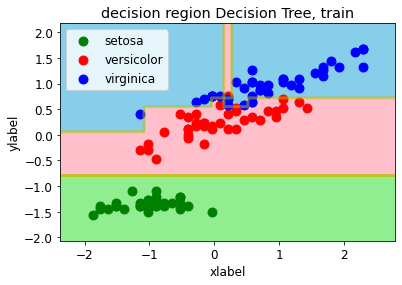

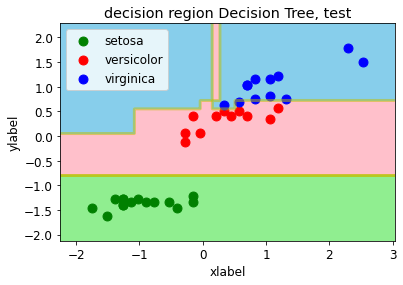

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


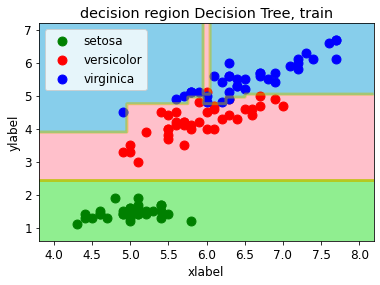

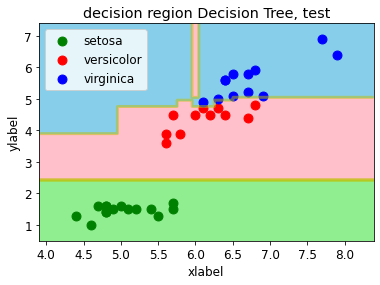

Random Forest
----with standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


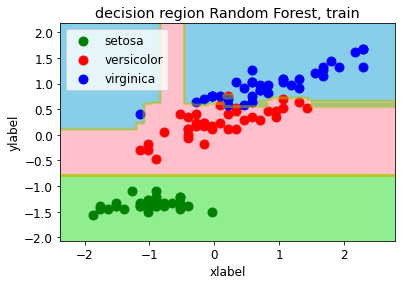

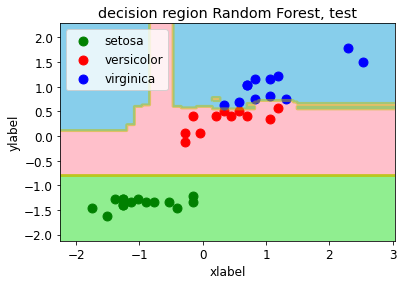

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


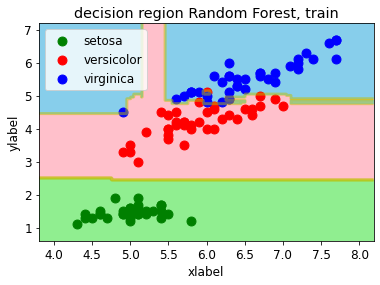

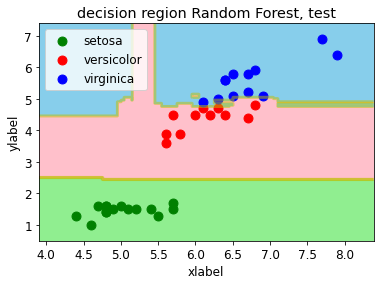

In [ ]:
X_train_ndarray = np.array(X_train)
X_test_ndarray = np.array(X_test)

models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ['1-nn', '3-nn', '5-nn', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

# さっきのfor文に標準化してないデータを処理するコードを追加
for model, model_name in zip(models, model_names):
    print(model_name)

    print('----with standard scaling----')
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate_multi(y_test, y_pred)))
    decision_region_3dim(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region_3dim(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

    print('----without standard scaling----')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate_multi(y_test, y_pred)))
    decision_region_3dim(X_train_ndarray, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region_3dim(X_test_ndarray, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

In [ ]:
# マイクロ平均も見る。acc, precision, recall, f1が全て同じになる

models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ["1-nn", "3-nn", "5-nn", "Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
for model, model_name in zip(models, model_names):
    print(model_name)
    
    print("<with standard scaling>")
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate_multi(y_test, y_pred, average='micro')))

    print("<without standard scaling>")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate_multi(y_test, y_pred, average='micro')))

1-nn
<with standard scaling>
acc : 0.8947368421052632
precision : 0.8947368421052632
recall : 0.8947368421052632
f1 : 0.8947368421052632
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]
<without standard scaling>
acc : 0.8947368421052632
precision : 0.8947368421052632
recall : 0.8947368421052632
f1 : 0.8947368421052632
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]
3-nn
<with standard scaling>
acc : 0.9473684210526315
precision : 0.9473684210526315
recall : 0.9473684210526315
f1 : 0.9473684210526315
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
<without standard scaling>
acc : 0.9473684210526315
precision : 0.9473684210526315
recall : 0.9473684210526315
f1 : 0.9473684210526315
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
5-nn
<with standard scaling>
acc : 0.9473684210526315
precision : 0.9473684210526315
recall : 0.9473684210526315
f1 : 0.9473684210526315
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
<without standard scaling>
acc : 0.9736